# 租房数据分析示例
## 学习目标
+ 能够完成租房数据分析的案例
## 1. 链家租房数据分析示例
### 1.1 数据加载和查看

1. 加载 LJdata.csv 数据集

In [1]:
import pandas as pd

house_data = pd.read_csv('./data/LJdata.csv')
house_data.head()

,区域,地址,标题,户型,面积,价格,楼层,建造时间,朝向,更新时间,看房人数,备注,链接地址
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,30,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,30,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html


2. 查看 house_data 数据的列标签

In [2]:
# 查看 house_data 数据的列标签
house_data.columns

Index(['区域', '地址', '标题', '户型', '面积', '价格', '楼层', '建造时间', '朝向', '更新时间', '看房人数',
       '备注', '链接地址'],
      dtype='object')

3. 重新设置 house_data 数据的列标签

In [3]:
house_data.columns = ['district', 'address', 'title', 'house_type', 'area', 
                      'price', 'floor', 'build_time', 'direction', 'update_time', 
                      'view_num', 'extra_info', 'link']
house_data.head()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,30,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,30,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html


4. 查看 house_data 数据的行列数量

In [4]:
house_data.shape

(2760, 13)

5. 查看数据集基本信息：每个字段值的数量、是否非空值，以及该字段的数据类型

In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   district     2760 non-null   object
 1   address      2760 non-null   object
 2   title        2760 non-null   object
 3   house_type   2760 non-null   object
 4   area         2760 non-null   int64 
 5   price        2760 non-null   int64 
 6   floor        2760 non-null   object
 7   build_time   2758 non-null   object
 8   direction    2760 non-null   object
 9   update_time  2760 non-null   object
 10  view_num     2760 non-null   int64 
 11  extra_info   2760 non-null   object
 12  link         2760 non-null   object
dtypes: int64(3), object(10)
memory usage: 280.4+ KB


6. 查看数据集中，所有数值型字段的基本统计信息

In [6]:
house_data.describe()

,area,price,view_num
count,2760.000000,2760.000000,2760.000000
mean,87.658696,7570.800725,13.448913
std,41.862928,6316.204986,12.746202
min,19.000000,1300.000000,0.000000
25%,58.000000,4500.000000,4.000000
50%,80.000000,6000.000000,10.000000
75%,103.000000,8500.000000,19.000000
max,720.000000,210000.000000,122.000000


7. 查看数据集中，所有非数值型字段的基本统计信息

In [7]:
import numpy as np
house_data.describe(include=[np.object_, pd.Categorical])

,district,address,title,house_type,floor,build_time,direction,update_time,extra_info,link
count,2760,2760,2760,2760,2760,2758,2760,2760,2760,2760
unique,208,1473,2369,24,105,138,35,14,1343,2381
top,望京租房,远洋山水,禾乔丽致公寓 诚意出租 看房随时 有钥匙,2室1厅,高楼层(共6层),2004年建塔楼,南 北,2017.07.26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101660289.html
freq,109,19,4,1284,323,78,1009,634,469,3


In [8]:
# 将 DataFrame 进行转置操作(行列互换)
house_data.describe(include=[np.object_, pd.Categorical]).T

,count,unique,top,freq
district,2760,208,望京租房,109
address,2760,1473,远洋山水,19
title,2760,2369,禾乔丽致公寓 诚意出租 看房随时 有钥匙,4
house_type,2760,24,2室1厅,1284
floor,2760,105,高楼层(共6层),323
build_time,2758,138,2004年建塔楼,78
direction,2760,35,南 北,1009
update_time,2760,14,2017.07.26,634
extra_info,2760,1343,随时看房 精装修 集中供暖,469
link,2760,2381,https://bj.lianjia.com/zufang/101101660289.html,3


### 1.2 租房数据简单分析
#### 分析需求：

1. 示例1：查看房屋租金的最高价格、最低价格、平均值和中位数
2. 示例2：找到租金最低和最高的房子的全部信息
3. 示例3：统计看房人数最多的前 20 的区域
4. 示例4：查看看房人数最多的房屋朝向
5. 示例5：查看出租房屋的户型分布情况
6. 示例6：查看热门小区(即：看房人数 TOP5 的小区)
7. 示例7：查看出租房源最多的小区
8. 示例8：查看望京租房价格在2000以下的房屋信息
9. 示例9：查看租房价格在2000以下的房屋信息，并按照价格从低到高排序

In [9]:
# 示例1：查看房屋租金的最高价格、最低价格、平均值和中位数
house_data['price'].max()
house_data['price'].min()
house_data['price'].mean()
house_data['price'].median() # 中位数

6000.0

In [10]:
# 示例2：找到租金最低和最高的房子的全部信息
# 获取租金最低的房子信息
house_data.sort_values('price').head(1)
# 或
# house_data[house_data['price']==house_data['price'].min()]
house_data[house_data.price==house_data.price.min()]
# 或
house_data.nsmallest(1, 'price')

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
2527,良乡租房,伟业嘉园西里,半地下室 家电齐全 集中供暖 简单装修,1室1厅,46,1300,地下室(共5层),2005年建,南,2017.07.19,14,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101538484.html


In [12]:
# 获取租金最高的房子信息
house_data.sort_values('price').tail(1)
# 或
# house_data[house_data['price']==house_data['price'].max()]
house_data[house_data.price==house_data.price.max()]
# 或
house_data.nlargest(1, 'price')

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
2658,和平里租房,雍和家园二期,雍和家园 底商出租 使用面积720米,6室3厅,720,210000,低楼层(共6层),2005年建板楼,南,2017.07.26,21,距离2号线雍和宫站293米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101672514.html


In [13]:
# 示例3：统计看房人数最多的前 20 的区域
result = house_data.groupby('district')['view_num'].sum().sort_values(ascending=False).head(20)
result

district
望京租房     1569
北苑租房     1237
双井租房      877
酒仙桥租房     833
广安门租房     812
朝青租房      737
回龙观租房     705
马甸租房      576
紫竹桥租房     515
东直门租房     473
官园租房      467
亦庄租房      454
安贞租房      452
鲁谷租房      434
金融街租房     433
广渠门租房     428
石佛营租房     402
天通苑租房     399
万柳租房      397
清河租房      390
Name: view_num, dtype: int64

<AxesSubplot:xlabel='district'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
c:\users\huawei\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\huawei\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\huawei\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31199 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\huawei\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\huawei\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_ag

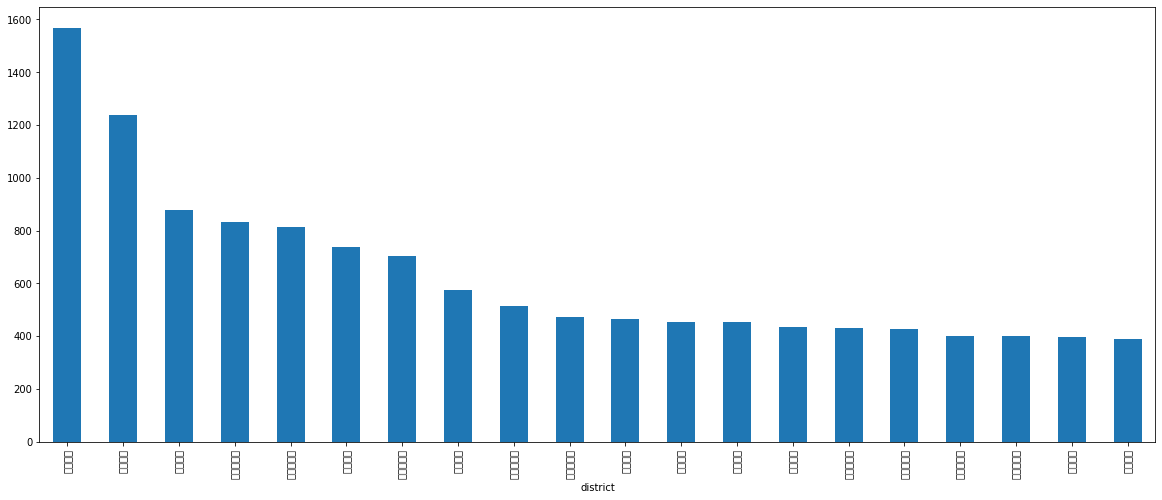

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
# Mac 设置显示中文
plt.rcParams['font.sans-serif'] = 'Arial Unicode MS'
# Windows 设置显示中文
# plt.rcParams['font.sans-serif'] = 'SimHei'

result.plot.bar(figsize=(20, 8))

![图形结果](./pic/chapter03-03.png)

In [15]:
# 示例4：查看看房人数最多的房屋朝向
house_data.groupby('direction')['view_num'].sum().sort_values(ascending=False).head(1)
# 或
house_data.groupby('direction')['view_num'].sum().nlargest(1)

direction
南 北    11785
Name: view_num, dtype: int64

<AxesSubplot:xlabel='house_type'>

c:\users\huawei\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23460 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\huawei\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\huawei\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\huawei\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21355 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\huawei\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 23460 missing from current font.
  font.set_t

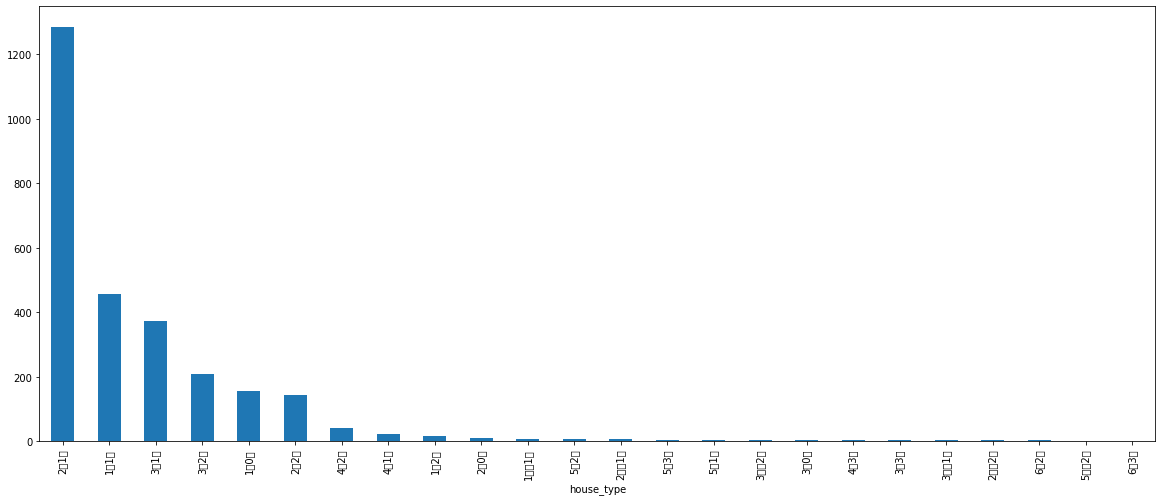

In [16]:
# 示例5：查看出租房屋的户型分布情况
result = house_data.groupby('house_type')['title'].count().sort_values(ascending=False)
result.plot.bar(figsize=(20, 8))

![图形结果](./pic/chapter03-04.png)

<AxesSubplot:xlabel='address'>

c:\users\huawei\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 33463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\huawei\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\huawei\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24067 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\huawei\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20854 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\huawei\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35834 missing from current font.
  font.set_t

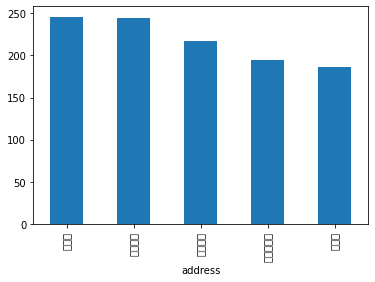

In [17]:
# 示例6：查看热门小区(即：看房人数 TOP5 的小区)
result = house_data.groupby('address')['view_num'].sum().sort_values(ascending=False).head()
result.plot.bar()

![图形结果](./pic/chapter03-04.png)

In [18]:
# 示例7：查看出租房源最多的小区
house_data.groupby('address')['title'].count().nlargest(n=1)

address
远洋山水    19
Name: title, dtype: int64

In [20]:
# 示例8：查看望京租房价格在2000以下的房屋信息
house_data.query('district=="望京租房" & price<=2000')
# 或
house_data[(house_data['district']=='望京租房') & (house_data['price'] <= 2000)]

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link


In [21]:
house_data[house_data['district']=='望京租房']['price'].min()

4500

In [22]:
# 示例9：查看租房价格在2000以下的房屋信息，并按照价格从低到高排序
house_data.query('price <= 2000').sort_values('price')
# 或
house_data[house_data['price'] <= 2000].sort_values('price')

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
2527,良乡租房,伟业嘉园西里,半地下室 家电齐全 集中供暖 简单装修,1室1厅,46,1300,地下室(共5层),2005年建,南,2017.07.19,14,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101538484.html
591,北关租房,西潞苑小区,西潞苑小区 西向正规二居室 两个房间都有空调 短租房,2室1厅,78,1500,中楼层(共4层),1999年建板楼,西,2017.07.26,1,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101848906.html
629,北关租房,西潞苑小区,西潞苑小区 西向正规二居室 两个房间都有空调 短租房,2室1厅,78,1500,中楼层(共4层),1999年建板楼,西,2017.07.26,1,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101848906.html
1614,良乡租房,北关东路社区,北关东路社区 1室1厅 1700元,1室1厅,36,1700,中楼层(共5层),1979年建,南,2017.07.23,5,随时看房,https://bj.lianjia.com/zufang/101101846245.html
1040,鼓楼大街租房,北环里小区,中间楼层东向<span>开间</span> 简单装修 看房随时,1室1厅,41,1800,中楼层(共5层),2004年建板楼,东,2017.07.23,9,距离昌平线昌平站909米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101770182.html
2610,南口租房,南厂北区,南厂北区新装两居 。,2室1厅,58,1800,高楼层(共6层),1990年建,南 北,2017.07.22,0,随时看房 精装修,https://bj.lianjia.com/zufang/101101824745.html
2660,鼓楼大街租房,北环里小区,北环里小区（天成苑） 1950元/月,1室0厅,37,1900,中楼层(共5层),2004年建板楼,东,2017.07.21,7,距离昌平线昌平站885米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101715900.html
953,阎村租房,天恒乐活城,天恒乐活城西北电梯一居改两居 有装修基本家具家电,2室1厅,61,1950,中楼层(共18层),2013年建板塔结合,西北,2017.07.14,12,随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101644848.html
2180,李桥租房,樱花园二区,樱花园二区 1室1厅 2000元,1室1厅,34,2000,中楼层(共6层),1999年建板楼,东南,2017.07.22,16,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101776862.html
2318,沙河租房,北街家园八区,北街家园八区开间，次顶层视野开阔,1室1厅,35,2000,高楼层(共18层),2010年建板塔结合,西,2017.07.26,1,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101850374.html


# 总结
+ 能够完成租房数据分析的案例